In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 179 kB 50.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639718 sha256=23d1d5a4d96d87c3a9cbc81fd6e4808e06a7f303087e3e008f1b8e06de3bff87
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2021-08-02 00:08:37--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-08-02 00:08:37 (25.0 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/gopinathvangari/Work/Career/Mission AI/Time Series Analysis/Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.columns = ['y']

In [5]:
df['ds'] = df.index

In [6]:
df.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [7]:
df.tail()

,y,ds
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [8]:
m = Prophet()

In [9]:
m.fit(df)

12:30:24 - cmdstanpy - INFO - Chain [1] start processing
12:30:24 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=12, freq='MS')

In [11]:
future.tail()

,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [12]:
forecast = m.predict(future)

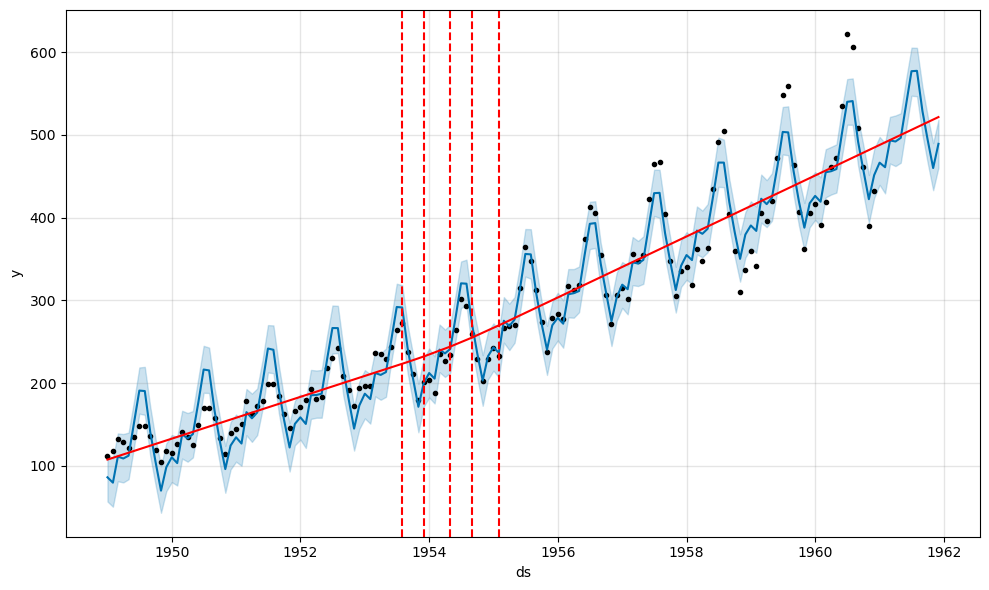

In [13]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

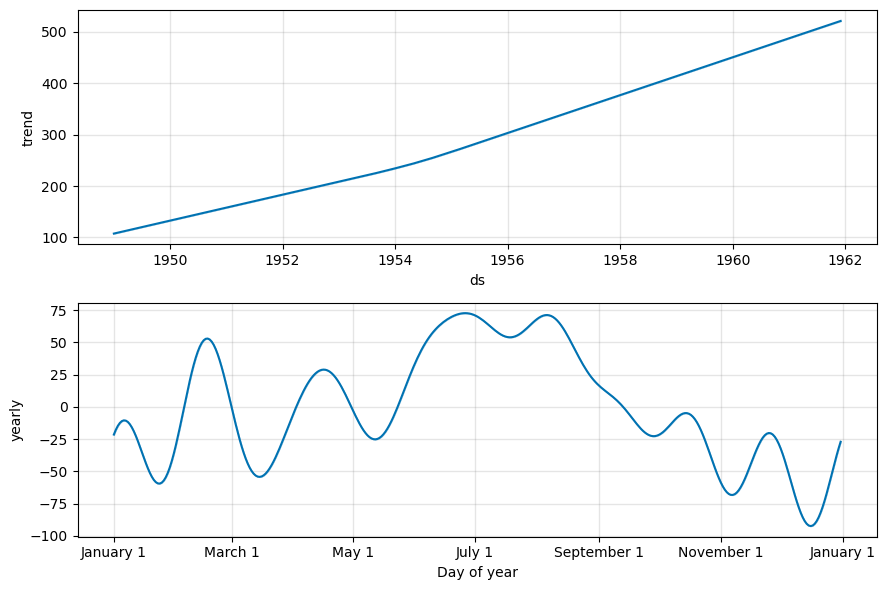

In [14]:
m.plot_components(forecast);

In [15]:
m2 = Prophet(seasonality_mode='multiplicative')

In [16]:
m2.fit(df)

12:32:01 - cmdstanpy - INFO - Chain [1] start processing
12:32:01 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m2.make_future_dataframe(periods=12, freq='MS')

In [18]:
forecast = m2.predict(future)

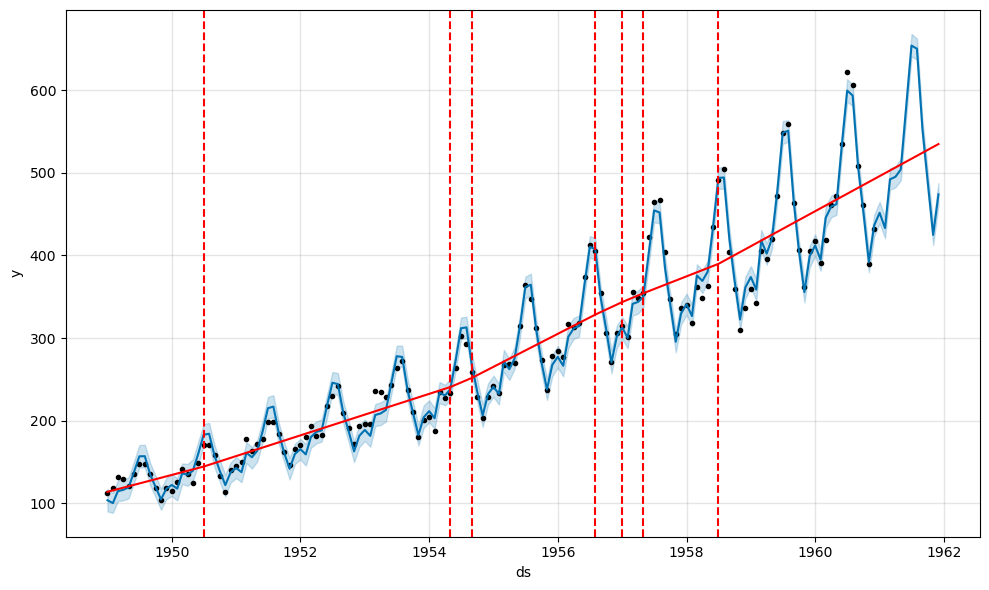

In [19]:
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

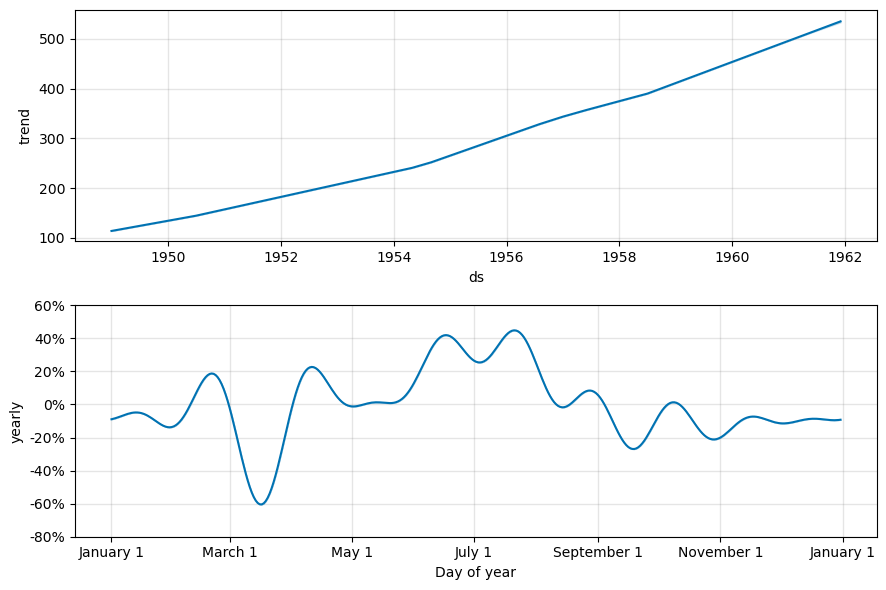

In [20]:
m2.plot_components(forecast);

In [21]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])

In [22]:
m3 = Prophet()

In [23]:
m3.fit(logdf)

12:32:30 - cmdstanpy - INFO - Chain [1] start processing
12:32:30 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = m3.make_future_dataframe(periods=12, freq='MS')

In [25]:
forecast = m3.predict(future)

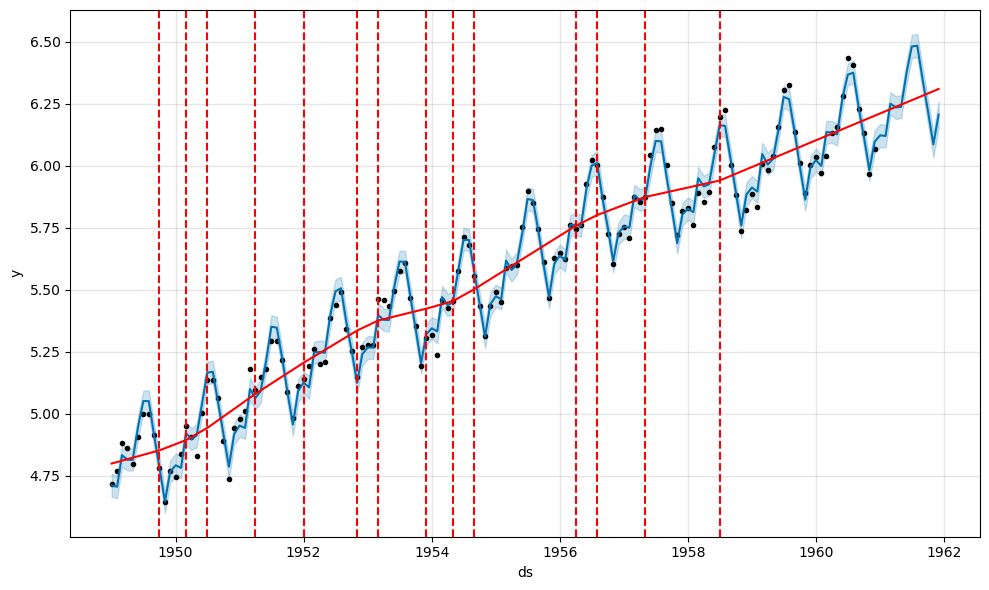

In [26]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

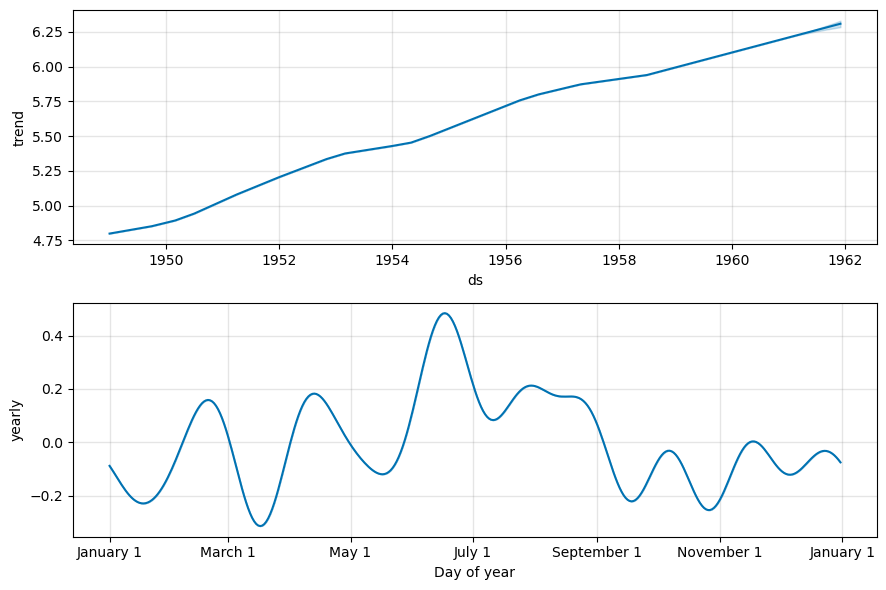

In [27]:
m3.plot_components(forecast);

### Outliers

In [28]:
df.loc['1955-01-01', 'y'] = 600
df.loc['1957-06-01', 'y'] = 1

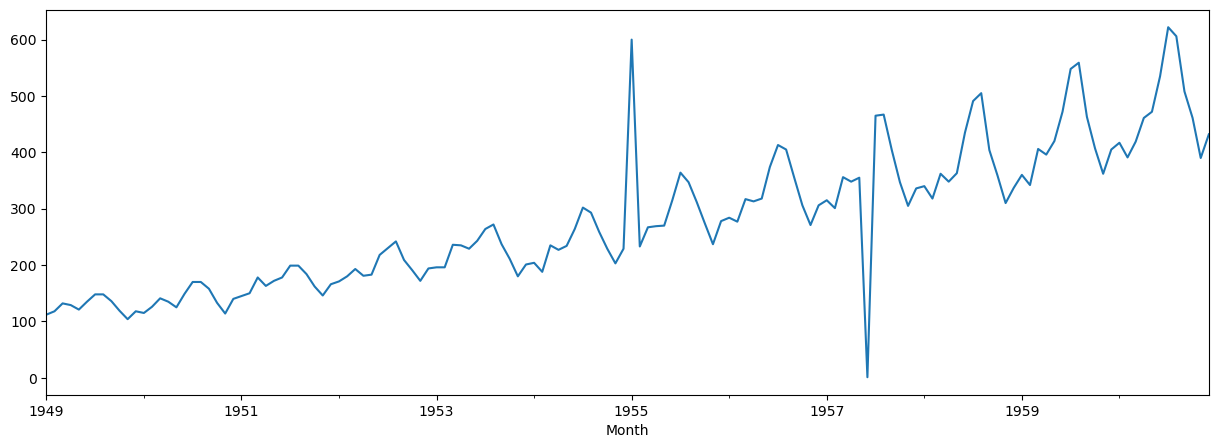

In [29]:
df['y'].plot(figsize=(15, 5));

12:33:01 - cmdstanpy - INFO - Chain [1] start processing
12:33:01 - cmdstanpy - INFO - Chain [1] done processing


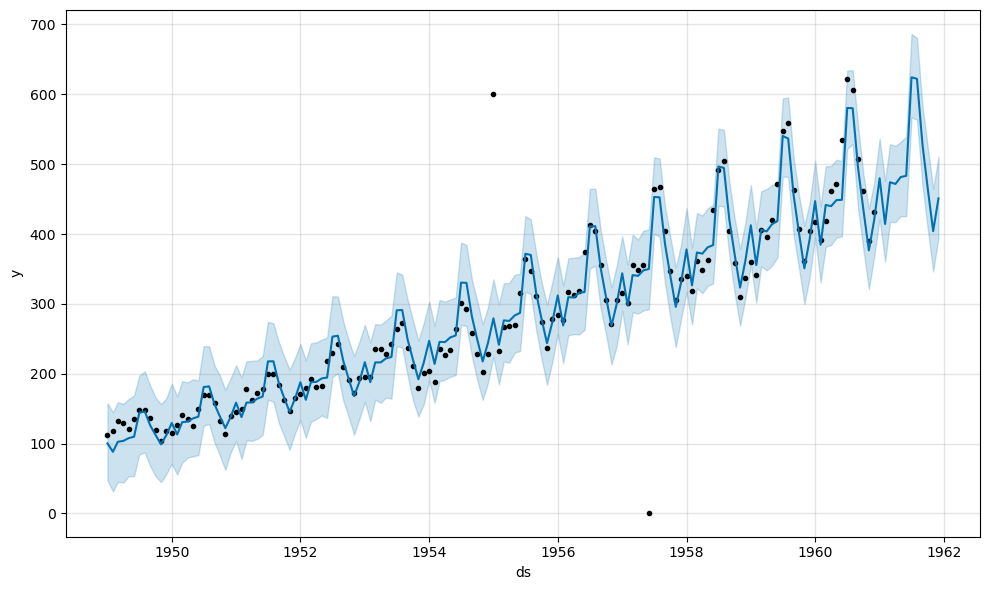

In [30]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast); # wide confidence interval

In [31]:
df2 = df[~df.index.isin(['1955-01-01', '1957-06-01'])]

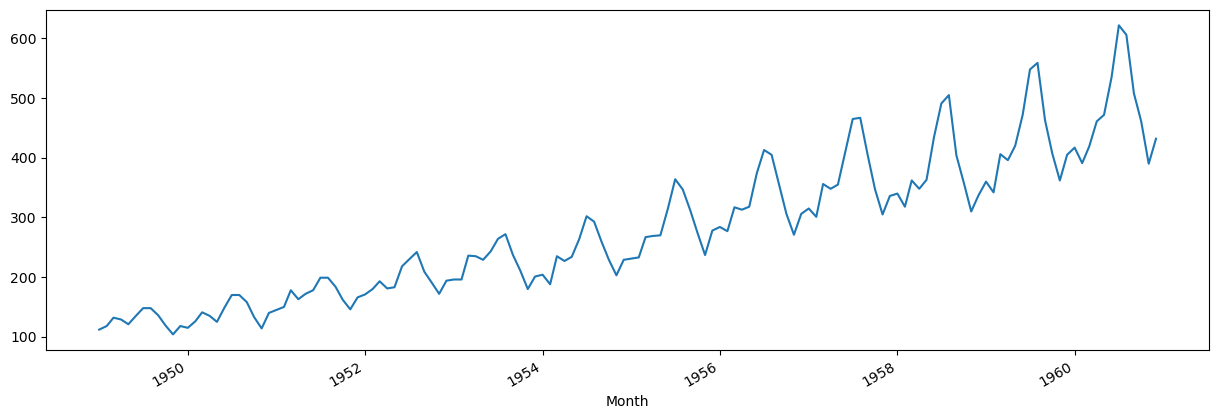

In [32]:
df2['y'].plot(figsize=(15, 5));

12:34:00 - cmdstanpy - INFO - Chain [1] start processing
12:34:00 - cmdstanpy - INFO - Chain [1] done processing


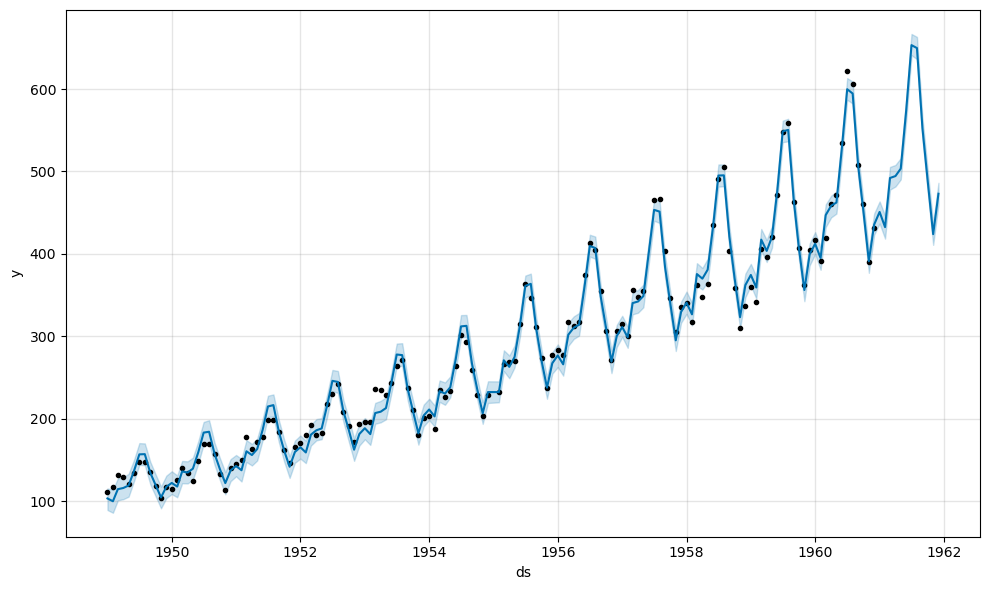

In [33]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast);